# Atividade #3 -- Aprendizado de Neurônio Perceptron

A atividade consiste no aprendizado de um neurônio perceptron para a solução do problema linearmente separável da porta lógica NAND.


### Bibliotecas

In [1]:
import numpy as np
from random import uniform
from matplotlib import pyplot as plt

### Conjunto de Treinamento

Entradas e Saídas relativas às combinações de entrada da porta lógica NAND


X -> Conjunto das entradas, onde cada entrada fora acrescida de bias de valor -1.

Y -> Conjunto das saidas relativas a cada entrada.

In [2]:
X = [[-1,0,0],[-1,0,1],[-1,1,0],[-1,1,1]] 
for i in range(len(X)):
    X[i] = np.asarray(X[i]) 

Y = [1,1,1,0]

### Vetor de Pesos

Vetor W contendo os pesos de cada entrada. Inicialmente W é gerada aleatoriamente no intervalo [-0.5, 0.5]

In [3]:
W=[]
for i in range(3):
    W.append(uniform(-0.5,0.5))
W = np.asarray(W)
print('Pesos Iniciais = ', W)

Pesos Iniciais =  [ 0.09865384 -0.37201234  0.33534841]


### Função de Ativação

Função degrau com limiar igual a zero.

      f(u = ∑xi·wi) = { 1, u ≥ 0.   
                        0, cc.

In [4]:
def ativacao(entrada, pesos):
    u = 0
    for i in range(3):
        u += entrada[i]*pesos[i]
    if (u>=0):
        return 1
    else:
        return 0

### Ajuste de Pesos

    Regra Delta:
    
    w(n+1) = w(n) + η·(yic − yio)·xi ;  yic: Saída correta para a entrada xi
                                        yio: Saída obtida para a entrada xi
                                        η: Taxa de aprendizado 

In [5]:
def ajuste(entradas, pesos, taxa, saida_correta, saida_obtida):
    for i in range(len(saida_correta)):
        erro = saida_correta[i]-saida_obtida[i]
        pesos = (pesos + (taxa*erro*entradas[i]))
    return pesos

### Treinamento do Perceptron

In [6]:
saida_obtida = []
taxa_aprendizado = 0.2
peso_por_epoca = W
epoca = 1
num_ajustes = 0

while(saida_obtida!=Y):
    print('Época ', epoca,':')
    print('\tVetor de Pesos:', W)
    saida_obtida=[]
    for i in range(len(X)):
        ativacao(X[i], W)
        saida_obtida.append(ativacao(X[i], W))

    corretos = 0
    errados = 0
    lista_erros = np.asarray(Y) - np.asarray(saida_obtida)
    for i in lista_erros:
        if i==0:
            corretos += 1
        else:
            errados +=1
    num_ajustes+=errados
    print('\tExemplos corretos:', corretos)
    print('\tExemplos errados:', errados)
    if saida_obtida != Y:
        W = ajuste(X, W, taxa_aprendizado, Y, saida_obtida)
        epoca+=1
        
print('\nTotal de épocas:', epoca)
print('Total de ajustes:', num_ajustes)        

Época  1 :
	Vetor de Pesos: [ 0.09865384 -0.37201234  0.33534841]
	Exemplos corretos: 2
	Exemplos errados: 2
Época  2 :
	Vetor de Pesos: [-0.30134616 -0.17201234  0.33534841]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  3 :
	Vetor de Pesos: [-0.10134616 -0.37201234  0.13534841]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  4 :
	Vetor de Pesos: [-0.30134616 -0.17201234  0.13534841]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  5 :
	Vetor de Pesos: [-0.10134616 -0.37201234 -0.06465159]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  6 :
	Vetor de Pesos: [-0.30134616 -0.17201234 -0.06465159]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  7 :
	Vetor de Pesos: [-0.10134616 -0.37201234 -0.26465159]
	Exemplos corretos: 2
	Exemplos errados: 2
Época  8 :
	Vetor de Pesos: [-0.50134616 -0.17201234 -0.06465159]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  9 :
	Vetor de Pesos: [-0.30134616 -0.37201234 -0.26465159]
	Exemplos corretos: 3
	Exemplos errados: 1
Época  10 :
	Vetor 

### Fronteira de Decisao

        y = W[0]/W[2] − (W[1]/W[2]) ∗ x

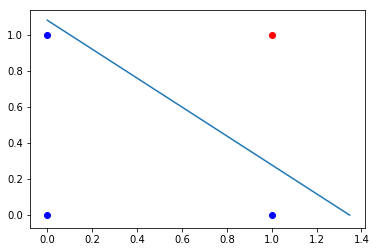

In [7]:
plt.scatter(0,0, color='blue')
plt.scatter(0,1, color='blue')
plt.scatter(1,0, color='blue')
plt.scatter(1,1, color='red')
plt.plot([0, ((W[0]/W[2])/(W[1]/W[2]))], [W[0]/W[2], 0])

plt.show()